# 1. Recommender system


### 1.1 - Movielens full - EDA
Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna neda

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

# movie and rating csv file path
movies = '../Labb/data/movies.csv'
ratings = '../Labb/data/ratings.csv'

# create a data frame for movies and ratings
df_movies  = pd.read_csv(movies)
df_ratings = pd.read_csv(ratings)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [3]:
df_movies.shape,df_ratings.shape

((58098, 3), (27753444, 4))

#### a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,utan försök undersöka fler aspekter av datan.

In [4]:
df_movies.info() # 3 columns, 9742 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [5]:
df_movies.isnull().sum() # No missing values

movieId    0
title      0
genres     0
dtype: int64

In [6]:
df_movies.describe().T # print the summary of statistics

,count,mean,std,min,25%,50%,75%,max
movieId,58098.0,111919.516197,59862.660956,1.0,72437.75,126549.0,161449.5,193886.0


In [7]:
df_movies['genres'].nunique()

1643

### Bar plot for movies genres

In [8]:
df_movies['genres'].head() # geners with | so we have to split 

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [9]:
df_genres_list =df_movies['genres'].str.split('|') # spilt generes using str.split()
df_genres_list

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
58093                                 [(no genres listed)]
58094                                             [Comedy]
58095                                              [Drama]
58096                   [Adventure, Drama, Horror, Sci-Fi]
58097                               [Action, Crime, Drama]
Name: genres, Length: 58098, dtype: object

In [10]:
movies = [name for genres in df_genres_list for name in genres] # list the each genres from df_genereslist 

In [11]:
# list' object has no attribute 'value_count'-> so we need to convert list to pd.Series
movies_gen = pd.Series(movies).value_counts()
movies_gen

Drama                 24144
Comedy                15956
Thriller               8216
Romance                7412
Action                 7130
Horror                 5555
Documentary            5118
Crime                  5105
(no genres listed)     4266
Adventure              4067
Sci-Fi                 3444
Mystery                2773
Children               2749
Animation              2663
Fantasy                2637
War                    1820
Western                1378
Musical                1113
Film-Noir               364
IMAX                    197
dtype: int64

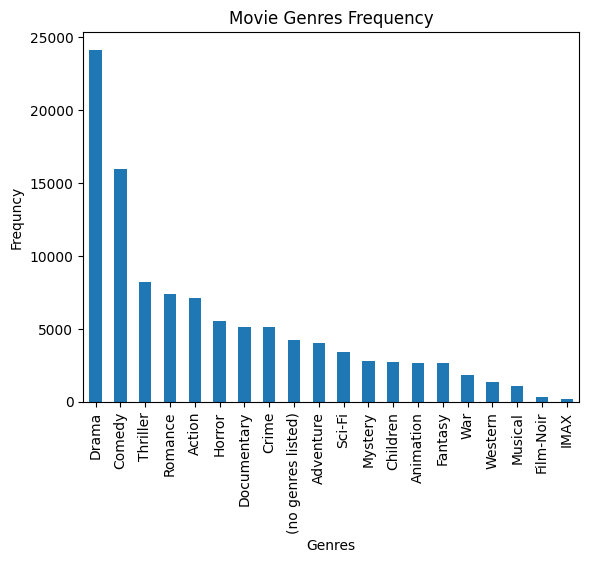

In [12]:
# To plot the movies genres using bar plot
movies_gen.plot(kind= 'bar', xlabel='Genres', ylabel='Frequncy', title='Movie Genres Frequency')
plt.show()

In [13]:
df_ratings.info() # 4 columns, 100836 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [14]:
df_ratings.describe().T # print summary of Statistics

,count,mean,std,min,25%,50%,75%,max
userId,27753444.0,1.419420e+05,8.170740e+04,1.0,71176.0,1.420220e+05,2.124590e+05,2.832280e+05
movieId,27753444.0,1.848800e+04,3.510263e+04,1.0,1097.0,2.716000e+03,7.150000e+03,1.938860e+05
rating,27753444.0,3.530445e+00,1.066353e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,27753444.0,1.193122e+09,2.160482e+08,789652004.0,998605251.0,1.174256e+09,1.422744e+09,1.537945e+09


### b) Vilka är de 10 filmerna med flest ratings?


In [15]:
# calculate the top 10 movies with most ratings
top10_movies_rating =df_ratings.groupby(by = 'movieId')['rating'].count().sort_values(ascending=False).head(10) 
print('Top 10 movie most rating are:' )
top10_movies_rating


Top 10 movie most rating are:


movieId
318     97999
356     97040
296     92406
593     87899
2571    84545
260     81815
480     76451
527     71516
110     68803
1       68469
Name: rating, dtype: int64

### c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [16]:
# check the data for only top 10 movies with most ratings 
top_10_ratings = df_ratings.query('movieId in @top10_movies_rating.index ')
top_10_ratings

,userId,movieId,rating,timestamp
42,4,1,4.0,1113765937
73,4,110,4.5,1113767070
102,4,260,4.5,1127947466
107,4,296,5.0,1113767056
111,4,318,5.0,1113766505
...,...,...,...,...
27753334,283228,260,5.0,1354137541
27753337,283228,356,4.0,1379882776
27753340,283228,480,4.5,1379882824
27753343,283228,593,5.0,1354159657


In [17]:
# caluclate the average mean value for those top 10 movies rating
top_10_mean_ratings = top_10_ratings.groupby('movieId')['rating'].mean()

print('The average mean value for top 10 movies rating are :')
round(top_10_mean_ratings,1)


The average mean value for top 10 movies rating are :


movieId
1       3.9
110     4.0
260     4.1
296     4.2
318     4.4
356     4.1
480     3.7
527     4.3
593     4.2
2571    4.1
Name: rating, dtype: float64

### d) Gör en plot över årtal och antalet filmer representerade i datasetet.

In [18]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
# extract the year from the title column
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)')
df_movies.head()


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [20]:
# count the number of movies per year
df_movies_per_year = df_movies.groupby(by='year')['movieId'].count()
df_movies_per_year

year
1874       1
1878       1
1883       1
1887       1
1888       4
        ... 
2014    2297
2015    2312
2016    2219
2017    1891
2018     861
Name: movieId, Length: 134, dtype: int64

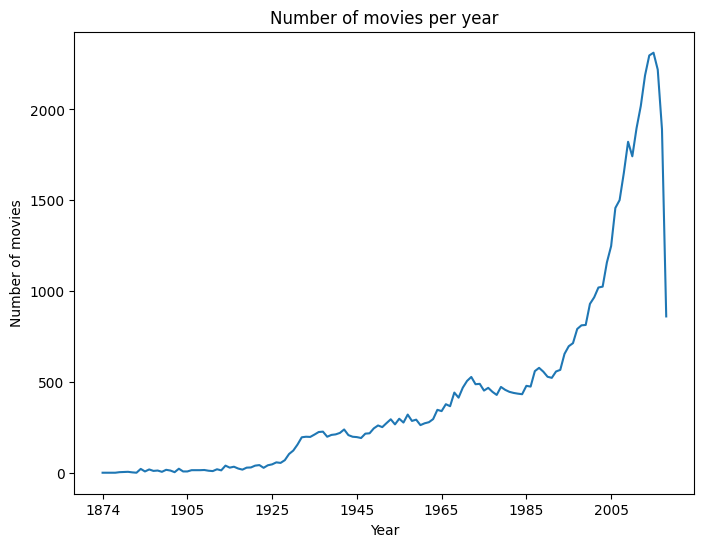

In [21]:

# Plot graphically
df_movies_per_year.plot(
    kind="line",
    xlabel="Year",
    ylabel="Number of movies",
    title="Number of movies per year",
    legend=False,figsize=(8, 6)
);


In [182]:
# split the title and year to separte column
#df_movies[['title', 'year']] = df_movies['title'].str.split('(', n=1, expand=True) # https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
#df_movies.head(10)

In [183]:
#df_movies['year']= df_movies['year'].str.strip(')') # to remove ')' in year column
#df_movies.head()

In [184]:
#df_movies_per_year1 = df_movies.groupby(by='year')['movieId'].count()
#df_movies_per_year1



### e) Gör en plot över antalet ratings mot movieId.

In [22]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [23]:
number_of_ratings = df_ratings.groupby(by='movieId')['rating'].count().reset_index()
number_of_ratings

,movieId,rating
0,1,68469
1,2,27143
2,3,15585
3,4,2989
4,5,15474
...,...,...
53884,193876,1
53885,193878,1
53886,193880,1
53887,193882,1


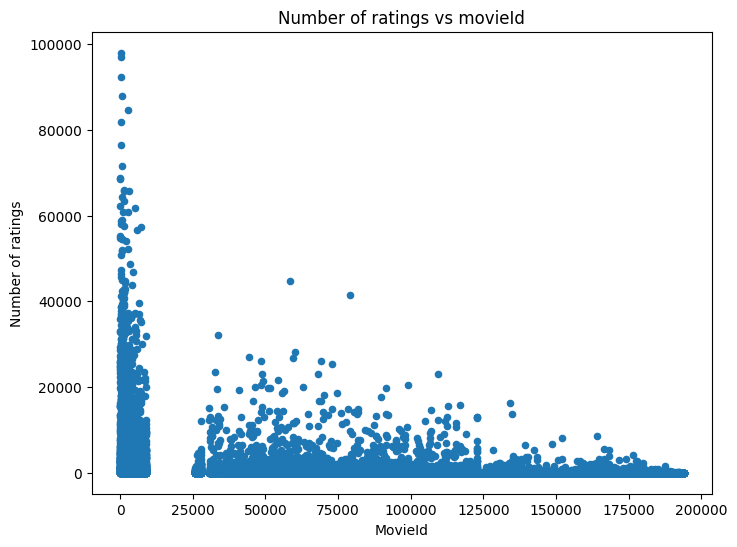

In [24]:

# Plot graphically
number_of_ratings.plot(
    kind="scatter",x="movieId",y="rating",
    xlabel="MovieId",
    ylabel="Number of ratings",
    title="Number of ratings vs movieId",
    legend=False,figsize=(8, 6)
);

### f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.


In [188]:
# top 10 movies with most ratings
top_10 = number_of_ratings.nlargest(10,columns='rating')
top_10

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
224,260,251
418,480,238
97,110,237
507,589,224
461,527,220


In [189]:
# To get movie names merge data
top_10_movie_title= pd.merge(top_10, df_movies, on='movieId')
top_10_movie_title

,movieId,rating,title,genres,year
0,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
1,318,317,"Shawshank Redemption, The (1994)",Crime|Drama,1994
2,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
3,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991
4,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
5,260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977
6,480,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993
7,110,237,Braveheart (1995),Action|Drama|War,1995
8,589,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi,1991
9,527,220,Schindler's List (1993),Drama|War,1993


In [190]:
# check the data for only top 10 movies with most ratings 
top_10_ratings = df_ratings.query('movieId in @top_10_movie_title["movieId"]')
top_10_ratings

,userId,movieId,rating,timestamp
7,1,110,4.0,964982176
15,1,260,5.0,964981680
16,1,296,3.0,964982967
20,1,356,4.0,964980962
26,1,480,4.0,964982346
...,...,...,...,...
99569,610,480,5.0,1479545821
99571,610,527,3.5,1479545826
99573,610,589,5.0,1479542983
99575,610,593,4.5,1479545819


In [191]:
top_10_movie_title_ratings_avg= top_10_ratings.groupby(by='movieId')['rating'].mean()
top_10_movie_title_ratings_avg

movieId
110     4.031646
260     4.231076
296     4.197068
318     4.429022
356     4.164134
480     3.750000
527     4.225000
589     3.970982
593     4.161290
2571    4.192446
Name: rating, dtype: float64

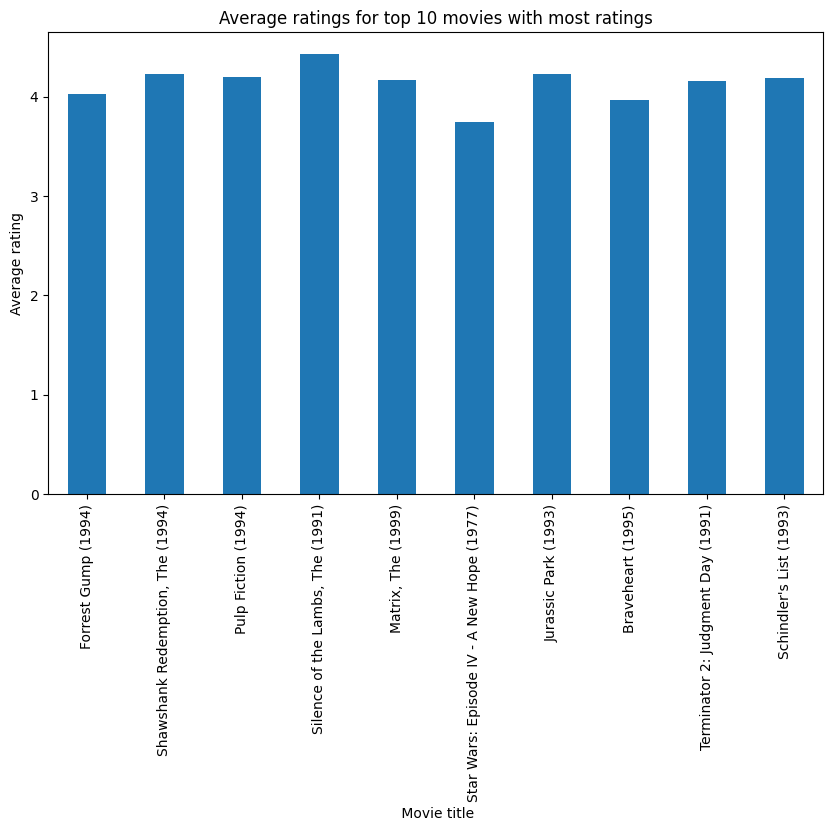

In [192]:
ax=top_10_movie_title_ratings_avg.plot(
    kind="bar",
    stacked=True,
    xlabel=" Movie title",
    ylabel="Average rating",
    title="Average ratings for top 10 movies with most ratings",
    figsize=(10, 6)
)
# Set the x-axis labels to the movie titles
ax.set_xticklabels(top_10_movie_title['title'])
plt.show()


### 1.2 Skapa gles matris
Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId"
och values: "ratings". Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att
klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset,
pröva dig fram och motivera.
Skapa en gles (sparse) matris av denna pivottabell mha scipy.sparse.csc_matrix().


- To filter the data we will consider the top 1000 movies with most ratings which are more or equal to 3.5 rating.
  - firstly group moveid and count number of ratings of each movie
  - then take only top 1000 movies rating
  - fiter the ratings of those 1000 movies
  - and then select only movies with 3.5 or more ratings from fitered ratings.

In [193]:
# Group the ratings by movieId and count the number of ratings for each movie
movie_ratings_count = df_ratings.groupby('movieId')['rating'].count()
movie_ratings_count


movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [194]:
# select only movieId with most ratings
most_rated_movieId= movie_ratings_count.nlargest(n=1000)
most_rated_movieId

movieId
356     329
318     317
296     307
593     279
2571    278
       ... 
3638     26
3869     26
3969     26
4128     26
4388     26
Name: rating, Length: 1000, dtype: int64

In [195]:
# Filter the ratings of most rated movies
filter_ratings= df_ratings.query('movieId in @most_rated_movieId.index')
filter_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100760,610,134130,3.5,1479543002
100763,610,134853,3.5,1493845106
100780,610,139385,4.5,1493846777
100808,610,152081,4.0,1493846503


In [196]:
# filter the rating more or equal to 3.5
filter_ratings= filter_ratings.query('rating >= 3.5')
filter_ratings


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100760,610,134130,3.5,1479543002
100763,610,134853,3.5,1493845106
100780,610,139385,4.5,1493846777
100808,610,152081,4.0,1493846503


In [197]:
# Create a pivot table with the filtered ratings
movies_users = filter_ratings.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)
movies_users


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
134853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
139385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5


In [198]:
from scipy.sparse import csr_matrix 

# convert pivot table to spare matrix
sparse_mat_movies_users = csr_matrix(movies_users.values)

### 1.3 Recommender system
Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i videon
som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.
- a) Beskriv med ord hur ditt system fungerar.


In [199]:
from sklearn.neighbors import NearestNeighbors
# Euclidean distance
# Manhattan distance
# MInkowski distance
# Cosine similarity
#model_knn = NearestNeighbors(metric= 'cosine', algorithm='brute', n_neighbors=5)
#model_knn.fit(sparse_mat_movies_users)

- Noted that there was a logical error in the original code where the selected movie was being included in the list of recommended movies.

In [201]:

from fuzzywuzzy import process
# Recommender(movie_name) -> List of Movies recommended
def recommender (movie_name, n_recommendation):
    model_knn = NearestNeighbors(metric= 'cosine', algorithm='brute', n_neighbors=5)
    model_knn.fit(sparse_mat_movies_users)

    idx = process.extractOne(movie_name, df_movies['title'])[2]
    print('Movie Selected:', df_movies['title'][idx], 'index:',idx)
    print('Searching for Recommendations.....')
    distances, indices = model_knn.kneighbors(sparse_mat_movies_users[idx], n_neighbors=n_recommendation+1)

    for i in indices[0][1:]:
        print(df_movies['title'][i])
recommender('toy story', n_recommendation=5)
    

Movie Selected: Toy Story (1995) index: 0
Searching for Recommendations.....
Some Folks Call It a Sling Blade (1993)
Island of Dr. Moreau, The (1996)
White Balloon, The (Badkonake sefid) (1995)
Blue in the Face (1995)
Boomerang (1992)


This recommender system uses KNN algorithm to print the top 5 recommended movies based on the input movie given by user.


Here the fuction defined as recommender which takes two parameters.
- movie_name: title of the movie given by user
- n_recommendation: number of recommendations, so we need for this system n=5

sparse matrix representing the userId-movieId rating matrix  and model is K-Nearest Neighbors model 

We use the process.extractOne function from the fuzzywuzzy package to find the closest matching movie title in the dataset and it should help to handle minor differences in spelling of title.

By using the KNN model, the distances and indices of the K-nearest neighbors of the selected movie are then calculated and we add 1 to the n_recommendation in kneighbors function because closest neigbour to the selected movie will be the movie itself which we want to exclude it.

Finally, the top 5 recommendations are printed by iterating through indices[0][1:] instead of just indices because we want to exclude the selected movie itself and then print their corresponding movie titles.

  

- b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa.